## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## Data Preprocessing

In [29]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [30]:
# describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [31]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


## NO MISSING VALUES

In [32]:
# find unique values
unique_values_dict = {col: df[col].unique() for col in df.columns}
print("--- Unique Values ---")
display(unique_values_dict)

unique_counts_series = df.nunique()
print("\n--- Counts of Unique Values (Series) ---")
display(unique_counts_series)

--- Unique Values ---


{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5


--- Counts of Unique Values (Series) ---


Income                   500
Age                       47
Education                  4
Credit_Score             328
Years_with_Bank           19
Transaction_Count         98
Balance                  500
Loan_Approval_Amount     500
Credit_Card_Limit        500
Purchase_Frequency       500
Customer_Satisfaction      4
Online_Activity          500
dtype: int64

In [33]:
# duplicate df
df_encoded = df.copy()
from sklearn.preprocessing import OrdinalEncoder

# Nominal Encoding
nominal_cols = ['Education']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.head()

{'Education': {'Bachelor': 0, 'High School': 1, 'Master': 2, 'PhD': 3}}


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0.0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1.0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1.0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1.0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0.0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


##  Exploratory Data Analysis

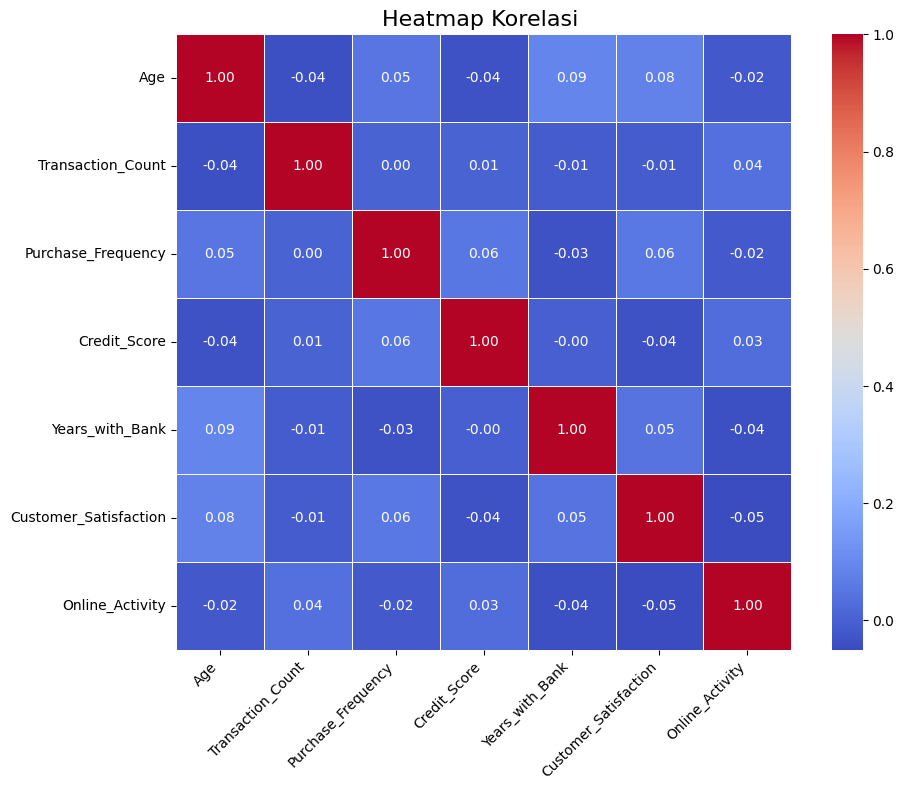

In [34]:
numerical_cols = ['Age','Transaction_Count', 'Purchase_Frequency', 'Credit_Score', 'Years_with_Bank', 'Customer_Satisfaction', 'Online_Activity']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Heatmap Korelasi ', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


### Interpretation
There is No Strong Relationships BECAUSE Every other square that is not diagonal is a light blue color, with values like 0.09, -0.04, 0.01, etc.

The "strongest" relationship on your chart is between Age and Years_with_Bank at 0.09, which is still considered a negligible or non-existent correlation.

Meaning nothing will be dropped because all unique

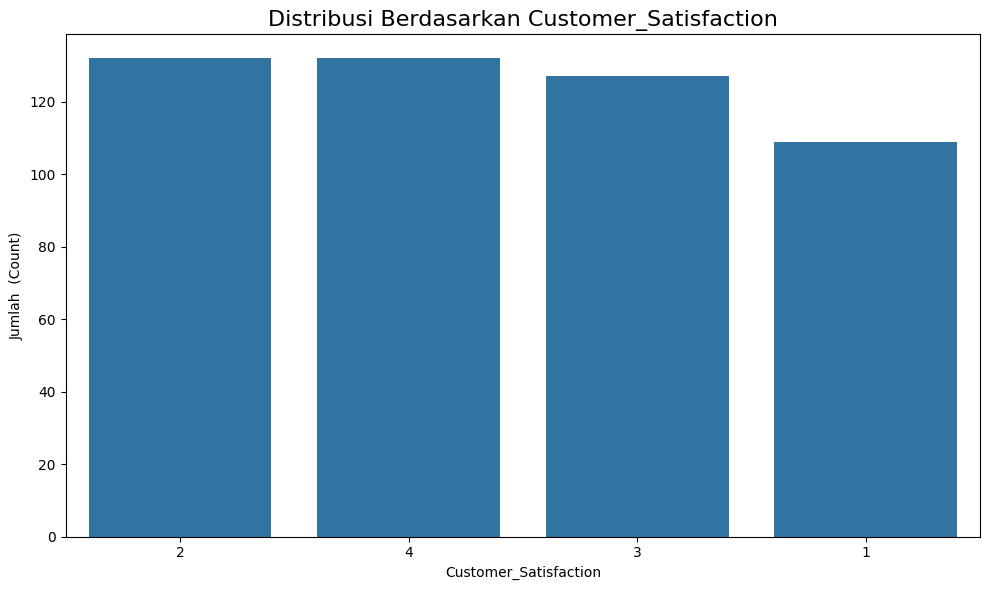

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Customer_Satisfaction',
    order = df['Customer_Satisfaction'].value_counts().index
)

plt.title('Distribusi Berdasarkan Customer_Satisfaction', fontsize=16)
plt.xlabel('Customer_Satisfaction')
plt.ylabel('Jumlah  (Count)')
plt.tight_layout()

### Interpretation
All four ratings (1, 2, 3, and 4) have a similar number of customers, with ratings 2 and 4 having the most (around 130) and rating 1 having the fewest (around 109).

The customer satisfaction ratings are very evenly distributed. There is no single rating that dominates.

C:\Users\amand\AppData\Local\Temp\ipykernel_26948\328577406.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




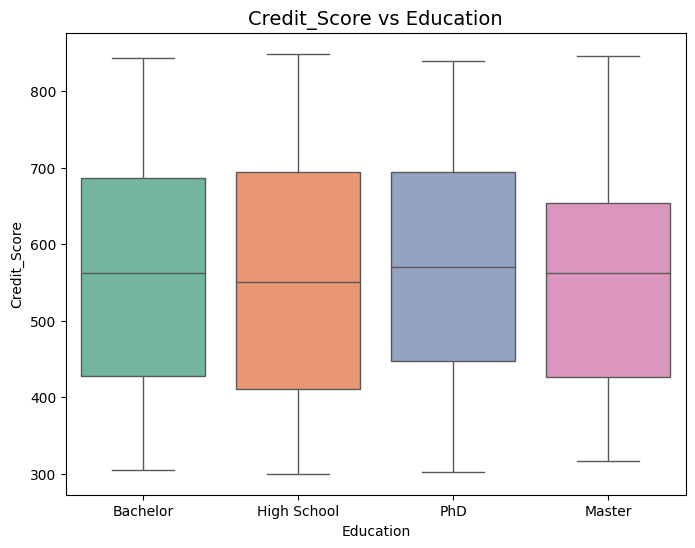

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Education', y='Credit_Score', data=df, palette="Set2")

plt.title("Credit_Score vs Education", fontsize=14)
plt.xlabel("Education")
plt.ylabel("Credit_Score")
plt.show()

### Interpretation
There are no visible outliers (dots above or below the line), indicating the data is clean in this view and The median  for all four groups is clustered in a very tight range, roughly between 550 and 570.

This means that Education on its own is not a strong differentiator for financial behavior (as measured by Credit_Score). The clustering model will need to use other features (like Income or Transaction_Count) to find meaningful financial segments.

## Clustering Modeling

#### SCALED

In [37]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df_encoded.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df_encoded[['Income', 'Age', 'Education', 'Credit_Score', 'Years_with_Bank',
    'Transaction_Count', 'Balance', 'Loan_Approval_Amount',
    'Credit_Card_Limit', 'Purchase_Frequency', 'Customer_Satisfaction',
    'Online_Activity']])
df_scaled = pd.DataFrame(df_scaled, columns=['Income', 'Age', 'Education', 'Credit_Score', 'Years_with_Bank',
    'Transaction_Count', 'Balance', 'Loan_Approval_Amount',
    'Credit_Card_Limit', 'Purchase_Frequency', 'Customer_Satisfaction',
    'Online_Activity'])
df_scaled.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,0.179150,1.303097,-1.291519,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013
1,0.749977,1.533191,-0.389620,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427
2,0.364249,0.459420,-0.389620,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595
3,0.165665,0.152629,-0.389620,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907
4,-0.250263,-0.307558,-1.291519,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898


In [38]:
# get stastical information on the new dataset
df_scaled.describe()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.158274e-16,1.421085e-16,5.151435e-17,2.593481e-16,1.598721e-16,9.237056e-17,-3.392842e-16,-1.918465e-16,4.085621e-17,1.492140e-16,-4.973799e-17,-8.171241e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.687691e+00,-1.688120e+00,-1.291519e+00,-1.666120e+00,-1.905592e+00,-1.653782e+00,-1.716418e+00,-1.706699e+00,-1.723224e+00,-1.811333e+00,-1.421875e+00,-1.676552e+00
25%,-8.535233e-01,-8.444436e-01,-1.291519e+00,-8.739031e-01,-7.396169e-01,-8.179404e-01,-8.547889e-01,-8.524396e-01,-8.660940e-01,-8.511311e-01,-5.127476e-01,-8.654451e-01
50%,-3.347132e-02,-7.746485e-02,-3.896201e-01,-1.881200e-02,3.769986e-02,-1.692579e-02,-3.416637e-02,8.970695e-03,1.912909e-02,6.587104e-02,3.963794e-01,-3.124291e-02
75%,8.033504e-01,8.429096e-01,5.122783e-01,7.985545e-01,8.150166e-01,8.189156e-01,8.593735e-01,9.102263e-01,8.839671e-01,8.868705e-01,1.305506e+00,8.997453e-01
max,1.723192e+00,1.839982e+00,1.414177e+00,1.785682e+00,1.592333e+00,1.759237e+00,1.683474e+00,1.725528e+00,1.681174e+00,1.702529e+00,1.305506e+00,1.717971e+00


#### UNSCALED

In [39]:
df_unscaled = df_encoded.copy()
df_unscaled.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0.0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1.0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1.0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1.0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0.0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [40]:
df_unscaled.describe()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,1.432000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,1.109883,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,0.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,0.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,1.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,2.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,3.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


## Silhouette Score

#### SCALED

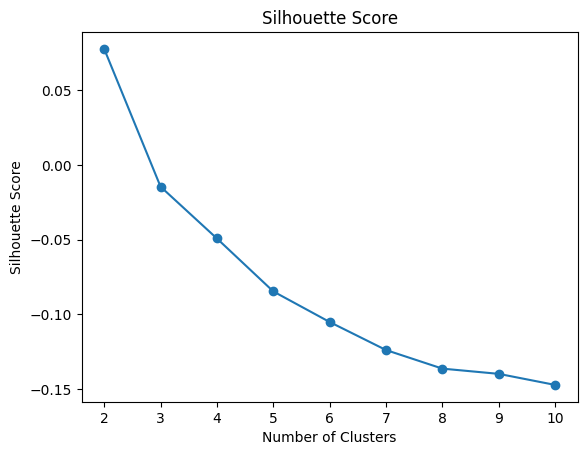

In [41]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Jumlah cluster optimal untuk data scaled ini adalah 2.
Ini menjelaskan bahwa ada dua kelompok alami yang berbeda dalam dataset.

#### UNSCALED

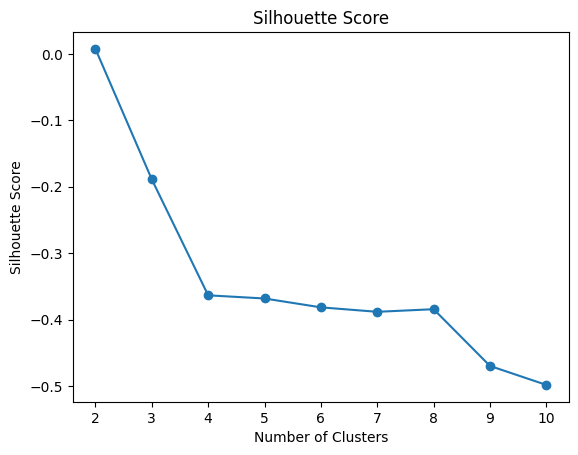

In [42]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_unscaled)
    silhouette_avg = silhouette_score(df_unscaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Jumlah cluster optimal untuk data unscaled ini adalah 2.
Ini menjelaskan bahwa ada dua kelompok alami yang berbeda dalam dataset.

## Comparing Silhouette Score to get best combination of linkage and metric

#### Scaled

Skipping Ward linkage with Manhattan metric (not supported).


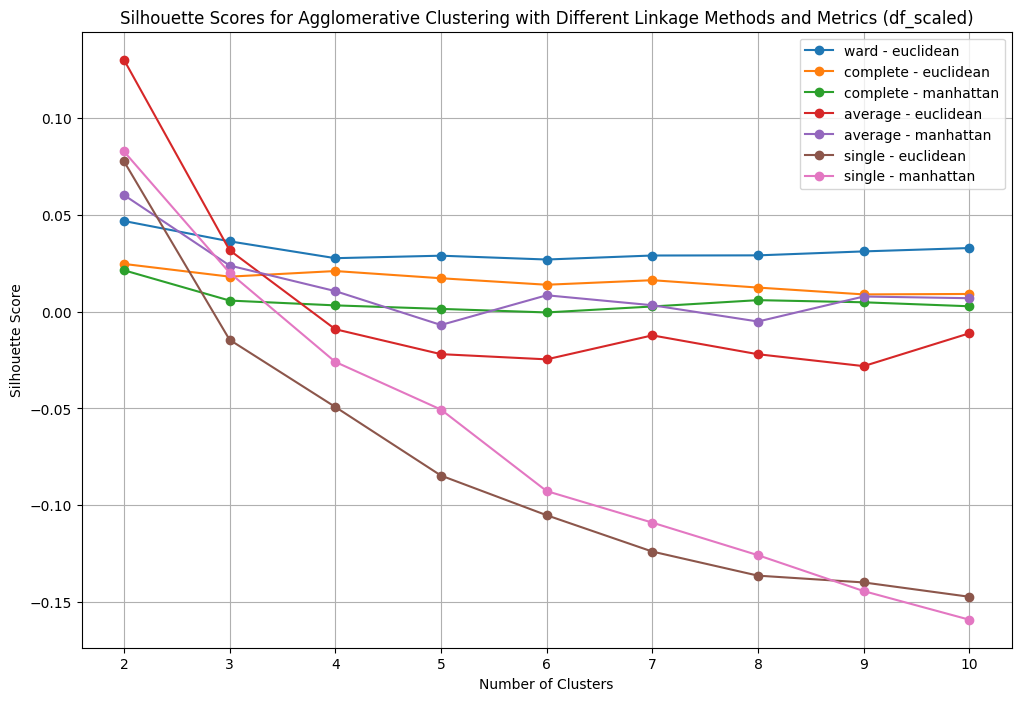

Best Silhouette Score: 0.12996339744287552
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: euclidean


In [43]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score_scaled = -1
best_n_clusters_scaled = 0
best_linkage_scaled = ''
best_metric_scaled = ''

results_for_plotting_scaled = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores_scaled = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores_scaled.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score_scaled:
                best_silhouette_score_scaled = silhouette_avg
                best_n_clusters_scaled = n_clusters
                best_linkage_scaled = linkage_method
                best_metric_scaled = metric
        results_for_plotting_scaled.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores_scaled
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting_scaled:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics (df_scaled)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score_scaled}")
print(f"Optimal Number of Clusters: {best_n_clusters_scaled}")
print(f"Optimal Linkage Method: {best_linkage_scaled}")
print(f"Optimal Metric: {best_metric_scaled}")

#### Unscaled

Skipping Ward linkage with Manhattan metric (not supported).


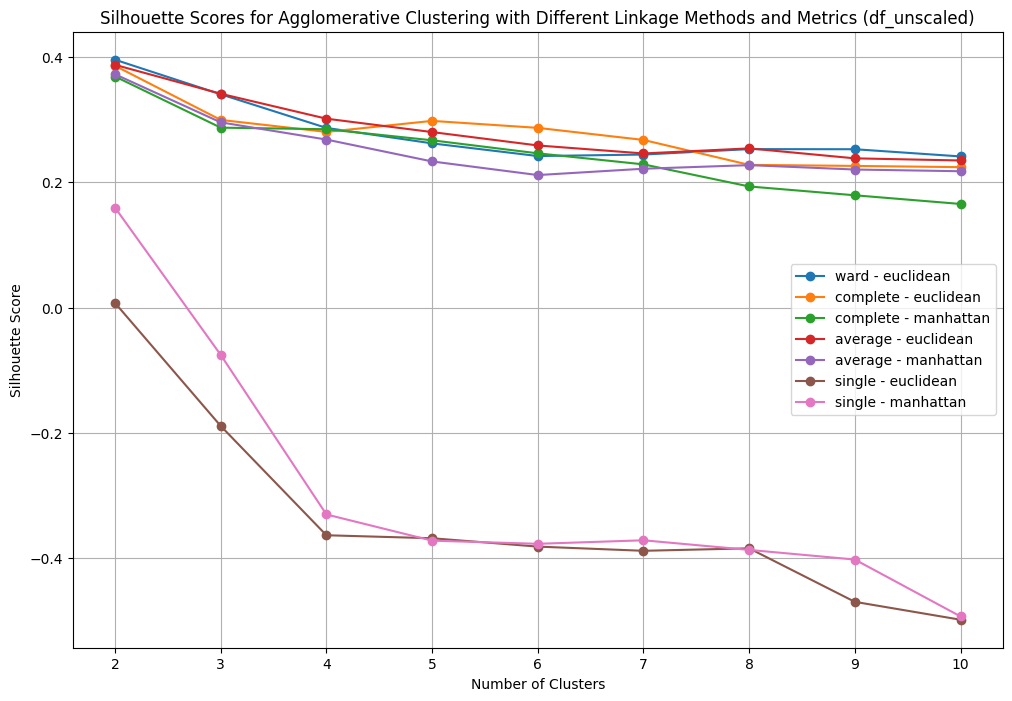

Best Silhouette Score: 0.39572706950108294
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [44]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score_unscaled = -1
best_n_clusters_unscaled = 0
best_linkage_unscaled = ''
best_metric_unscaled = ''

results_for_plotting_unscaled = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores_unscaled = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_unscaled)
            silhouette_avg = silhouette_score(df_unscaled, y_agglo)
            current_scores_unscaled.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score_unscaled:
                best_silhouette_score_unscaled = silhouette_avg
                best_n_clusters_unscaled = n_clusters
                best_linkage_unscaled = linkage_method
                best_metric_unscaled = metric
        results_for_plotting_unscaled.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores_unscaled
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting_unscaled:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics (df_unscaled)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score_unscaled}")
print(f"Optimal Number of Clusters: {best_n_clusters_unscaled}")
print(f"Optimal Linkage Method: {best_linkage_unscaled}")
print(f"Optimal Metric: {best_metric_unscaled}")

## Hierarchical Clustering Model

In [45]:
# Hierarchical Clustering "Complete"
agglo_scaled = AgglomerativeClustering(n_clusters=best_n_clusters_scaled, linkage=best_linkage_scaled, metric=best_metric_scaled)
y_scaled = agglo_scaled.fit_predict(df_scaled)

# Hierarchical Clustering "Ward"
agglo_unscaled = AgglomerativeClustering(n_clusters=best_n_clusters_unscaled, linkage=best_linkage_unscaled, metric=best_metric_unscaled)
y_unscaled = agglo_unscaled.fit_predict(df_unscaled)

In [46]:
# Evaluation
ss_scaled = silhouette_score(df_scaled, y_scaled)
print(ss_scaled)
ss_unscaled = silhouette_score(df_unscaled, y_unscaled)
print(ss_unscaled)

0.12996339744287552
0.39572706950108294


## Merge with the original data

In [47]:
# Add the cluster labels to the original data
df_encoded['Agglo_Scaled'] = y_scaled
df_encoded['Agglo_Unscaled'] = y_unscaled
# Analyze the clusters with the original values
df_encoded.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo_Scaled,Agglo_Unscaled
0,66161.01279,57,0.0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0,0
1,78639.20248,60,1.0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0,0
2,70207.25321,46,1.0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,0
3,65866.23872,42,1.0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0,0
4,56774.10995,36,0.0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,1


In [48]:
# Compare the final silhouette_score
print(f"Silhouette Score (Scaled Model): {ss_scaled:.4f}")
print(f"Silhouette Score (Unscaled Model): {ss_unscaled:.4f}")

# Answer the question: Which one is higher?
if ss_scaled > ss_unscaled:
    print("--> The SCALED model is better.")
else:
    print("--> The UNSCALED model is better.")

Silhouette Score (Scaled Model): 0.1300
Silhouette Score (Unscaled Model): 0.3957
--> The UNSCALED model is better.


In [49]:
# Compare with visualitation

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Income', 
    y='Online_Activity', 
    hue='Agglo_Scaled',
    palette='deep'
)
plt.title('Clusters from SCALED Data (Income vs. Online Activity)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Income', 
    y='Online_Activity', 
    hue='Agglo_Unscaled',
    palette='deep'
)
plt.title('Clusters from UNSCALED Data (Income vs. Online Activity)')
plt.show()

ValueError: Could not interpret value `Agglo_Scaled` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_Scaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo_Scaled)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

KeyError: 'Agglo_Scaled'

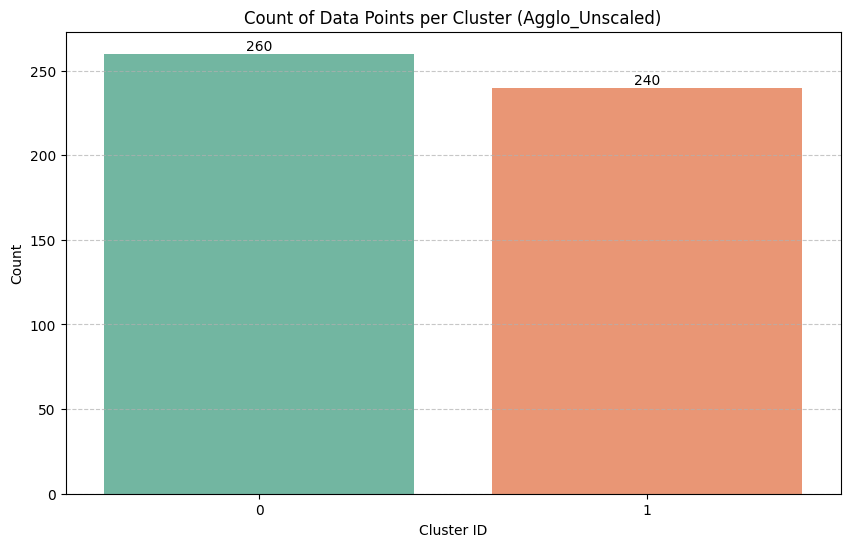

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_Unscaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo_Unscaled)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the distribution of data points per cluster, we can see that when we use unscaled the distribution is 260 to 240 while if we use Scaled the distribution is 499 to 1

In [51]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Online_Activity'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo_Scaled'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

KeyError: 'Agglo_Scaled'

In [ ]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Online_Activity'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo_Unscaled'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

## Segmentation & Managerial Implication

### Summarize and discuss which model is better:

○ Which version (scaled or unscaled) produces clearer cluster separation?

The unscaled version produced clearer and more distinct cluster separation, as shown by its much higher silhouette score.

Unscaled Model Score: 0.3957 (This indicates a fair level of cluster separation.)

Scaled Model Score: 0.1300 (This indicates weak, overlapping clusters.)

○ Why does scaling affect the clustering result?

Without Scaling (Your Unscaled Model): Features with large numerical ranges (like Income, Balance, Loan_Approval_Amount) completely dominate the distance calculation. The model barely pays any attention to features with small ranges (like Education [1-4], Age [20-70], or Customer_Satisfaction [1-10]).

With Scaling (Your Scaled Model): Scaling (like StandardScaler) gives every feature equal importance. Income is put on the same scale (e.g., -2 to +2) as Education and Age. The model is forced to consider all 12 features equally when calculating distance.


In [52]:
agg_rules_banking = {
    'Income': ['mean', 'std', 'size'],
    'Balance': ['mean', 'std'],
    'Credit_Score': ['mean', 'std'],
    'Loan_Approval_Amount': ['mean', 'std'],
    'Credit_Card_Limit': ['mean', 'std'],
    'Transaction_Count': ['mean'],
    'Purchase_Frequency': ['mean'],
    'Online_Activity': ['mean'],
    'Years_with_Bank': ['mean'],
    'Age': ['mean'],
    'Education': ['mean'], 
    'Customer_Satisfaction': ['mean']
}

print(f"--- Ringkasan Cluster: Model 'Unscaled' (Skor {ss_unscaled:.4f}) ---")

cluster_summary_unscaled = df_encoded.groupby('Agglo_Unscaled').agg(agg_rules_banking)
display(cluster_summary_unscaled)


print(f"\n--- Ringkasan Cluster: Model 'Scaled' (Skor {ss_scaled:.4f}) ---")

cluster_summary_scaled = df_encoded.groupby('Agglo_Scaled').agg(agg_rules_banking)
display(cluster_summary_scaled)

--- Ringkasan Cluster: Model 'Unscaled' (Skor 0.3957) ---


Income                         Balance               \
                        mean           std size         mean          std   
Agglo_Unscaled                                                              
0               80056.384759  12503.832639  260  5307.329049  2834.343985   
1               42948.964656  10547.367150  240  4797.946011  3006.497695   

               Credit_Score             Loan_Approval_Amount                \
                       mean         std                 mean           std   
Agglo_Unscaled                                                               
0                566.538462  157.920764         24079.854446  14514.079605   
1                563.316667  160.901565         26820.821008  13862.864650   

               Credit_Card_Limit              Transaction_Count  \
                            mean          std              mean   
Agglo_Unscaled                                                    
0                   10299.053313  5412.027733         45.565385   
1                   10946.801520  5733.062270         51.650000   

               Purchase_Frequency Online_Activity Years_with_Bank        Age  \
                             mean            mean            mean       mean   
Agglo_Unscaled                                                                 
0                        0.518549        0.473096       10.584615  40.007692   
1                        0.506474        0.517722       11.045833  40.012500   

               Education Customer_Satisfaction  
                    mean                  mean  
Agglo_Unscaled                                  
0               1.457692                 2.600  
1               1.404167                 2.525


--- Ringkasan Cluster: Model 'Scaled' (Skor 0.1300) ---


Income                         Balance               \
                      mean           std size         mean          std   
Agglo_Scaled                                                              
0             62309.354374  21856.013364  499  5069.211372  2925.861816   
1             30043.722360           NaN    1  1876.120792          NaN   

             Credit_Score             Loan_Approval_Amount               \
                     mean         std                 mean          std   
Agglo_Scaled                                                              
0              564.867735  159.342155         25440.658681  14235.57928   
1              627.000000         NaN          2870.516328          NaN   

             Credit_Card_Limit              Transaction_Count  \
                          mean          std              mean   
Agglo_Scaled                                                    
0                 10624.569381  5568.265002          48.38477   
1                  3326.105319          NaN          99.00000   

             Purchase_Frequency Online_Activity Years_with_Bank        Age  \
                           mean            mean            mean       mean   
Agglo_Scaled                                                                 
0                      0.512712        0.494041       10.821643  39.963928   
1                      0.533350        0.731649        3.000000  63.000000   

             Education Customer_Satisfaction  
                  mean                  mean  
Agglo_Scaled                                  
0              1.43487              2.567134  
1              0.00000              1.000000

# Implikasi Manajerial Berdasarkan Hasil Clustering (Model Unscaled)

Berdasarkan skor Silhouette (0.3957), model Unscaled memberikan pemisahan cluster yang lebih baik. Ini menunjukkan bahwa segmen nasabah paling jelas dibedakan oleh fitur-fitur dengan nilai nominal besar, terutama Income (Pendapatan) dan Credit-related metrics (Loan Approval & Credit Card Limit).

## Cluster 0 (n=260) — Nasabah Mapan Berpenghasilan Tinggi
Profil: Pendapatan Rata-rata: $80,056 | Jumlah Transaksi Rata-rata: 45.5 | Rata-rata Pinjaman Disetujui: $24,079

Makna: Ini adalah segmen premium. Mereka memiliki kapasitas finansial (pendapatan) yang jauh lebih tinggi (hampir 2x lipat dari Cluster 1) tetapi secara mengejutkan kurang aktif dalam bertransaksi. Mereka juga menggunakan fasilitas kredit (pinjaman & limit kartu) yang lebih rendah relatif terhadap pendapatan mereka. Ini adalah segmen bernilai tinggi dengan potensi cross-selling dan up-selling yang sangat besar.

Strategi:

- Strategi Produk & Pemasaran: Fokus pada Wealth Management dan Layanan Premium. Tawarkan produk investasi (misal: reksa dana, obligasi, wealth advisory), kartu kredit premium (dengan benefit travel/lifestyle), dan produk tabungan/deposito dengan bunga tinggi. Pemasaran harus bersifat personal dan eksklusif.

- Fokus Penjualan: Gunakan pendekatan Relationship-Based. Tugaskan Relationship Manager (RM) khusus untuk mengelola portofolio mereka. Fokus penjualan bukan pada diskon, tetapi pada pencapaian tujuan finansial jangka panjang dan layanan eksklusif.

Fokus KPI:

- Customer Lifetime Value (CLV)

- Assets Under Management (AUM) / Total Dana Kelolaan

- Cross-Sell Ratio (Jumlah produk per nasabah)

## Cluster 1 (n=240) — Nasabah Transaksional Aktif
Profil: Pendapatan Rata-rata: $42,948 | Jumlah Transaksi Rata-rata: 51.6 | Rata-rata Pinjaman Disetujui: $26,820

Makna: Ini adalah segmen "mesin" harian bank. Meskipun pendapatan mereka jauh lebih rendah, mereka lebih aktif (transaksi lebih tinggi) dan lebih banyak menggunakan kredit (Limit Kartu Kredit dan Pinjaman Disetujui sedikit lebih tinggi) dibandingkan Cluster 0. Segmen ini kemungkinan besar menyumbang pendapatan signifikan dari interest income (bunga pinjaman/kartu kredit) dan fee-based income (biaya transaksi).

Strategi:

- Strategi Produk & Pemasaran: Fokus pada Retensi dan Kemudahan Transaksi. Tawarkan program loyalitas/rewards (cashback, poin) untuk aktivitas transaksi mereka. Promosikan fitur digital (aplikasi mobile banking) yang memudahkan pembayaran, transfer, dan cicilan.

- Fokus Penjualan: Gunakan pemasaran digital yang tertarget (email, notifikasi aplikasi) berdasarkan perilaku transaksi mereka. Tawarkan promo cicilan 0%, balance transfer, atau kenaikan limit kartu kredit secara proaktif.

Fokus KPI:

- Customer Retention Rate (Tingkat Retensi Nasabah)

- Transaction Volume (Volume & Frekuensi Transaksi)

- Credit Card Utilization (Penggunaan Limit Kartu Kredit)

## Rekomendasi Umum
Prioritas Strategis:

- Prioritas Pertumbuhan (Growth): Fokus pada Cluster 0. Mereka memiliki potensi finansial terbesar yang belum dimanfaatkan. Targetkan mereka untuk meningkatkan AUM dan menjual produk investasi.

- Prioritas Retensi (Retention): Fokus pada Cluster 1. Mereka adalah nasabah inti yang aktif. Jaga loyalitas mereka dengan rewards dan kemudahan digital, karena mereka adalah segmen yang paling mungkin pindah ke bank lain yang menawarkan program lebih baik.

Manajemen Risiko:

Perhatikan Cluster 1 dengan lebih seksama. Fakta bahwa mereka memiliki pendapatan yang jauh lebih rendah namun jumlah pinjaman dan limit kartu kredit yang sedikit lebih tinggi menunjukkan profil risiko yang lebih tinggi. Pastikan model penilaian kredit akurat dan pantau rasio kredit macet (NPL) untuk segmen ini.

Segmentasi Layanan:

- Cluster 0 (High-Touch): Berikan layanan personal (Relationship Manager).

- Cluster 1 (High-Tech): Berikan layanan digital yang cepat, andal, dan penuh promo.